In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

from fastai import *
from fastai.vision import *

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['eyg']


In [2]:
!cp -r '/kaggle/input/eyg' /kaggle/working/datos

In [3]:
clases = ['Vinchuca','No Vinchucas']
path = Path('/kaggle/working/datos')

In [4]:
np.random.seed(54)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(flip_vert=True), size=64, num_workers=0).normalize(imagenet_stats)

In [5]:
data.classes

['No Vinchucas', 'Vinchuca']

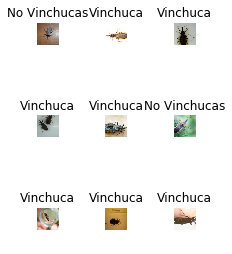

In [6]:
data.show_batch(rows=3, figsize=(3,4))

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 129035625.64it/s]


In [8]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,time
0,0.810181,0.957266,0.561644,00:02
1,0.801063,0.634197,0.356164,00:01
2,0.759633,0.494403,0.178082,00:01
3,0.688236,0.457032,0.164384,00:01
4,0.630196,0.417302,0.164384,00:01
5,0.565652,0.448221,0.164384,00:01
6,0.542273,0.436687,0.136986,00:01
7,0.508820,0.440686,0.123288,00:01
8,0.480368,0.439628,0.150685,00:01
9,0.456298,0.451124,0.136986,00:01


In [9]:
learn.save('stage-1')

In [10]:
ls  ../working/datos/models --size

total 89712
89712 stage-1.pth


In [11]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


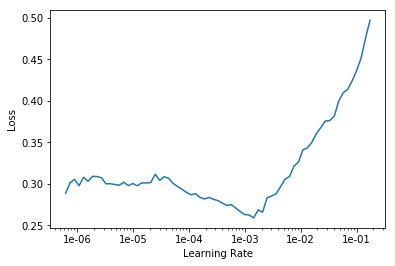

In [12]:
learn.lr_find()
learn.recorder.plot()


In [13]:
learn.fit_one_cycle(13, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.364346,0.431834,0.136986,00:01
1,0.345980,0.413313,0.123288,00:01
2,0.311790,0.418712,0.123288,00:01
3,0.302995,0.391575,0.150685,00:01
4,0.292993,0.367473,0.150685,00:01
5,0.286858,0.377715,0.164384,00:01
6,0.273141,0.381851,0.164384,00:01
7,0.260474,0.366279,0.123288,00:01
8,0.246625,0.356368,0.123288,00:01
9,0.234106,0.357158,0.123288,00:01


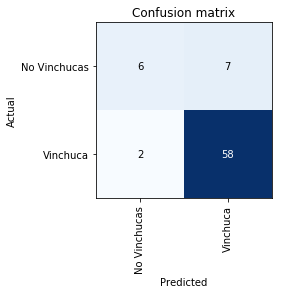

In [14]:
learn.save('stage-2')
learn.load('stage-2');
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()